<a href="https://colab.research.google.com/github/sojeongii/cvcvcv/blob/main/cv_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 경로 지정


In [2]:
%cd drive/My\ Drive/2022_cv_project
!pwd
!ls -la

/content/drive/My Drive/2022_cv_project
/content/drive/My Drive/2022_cv_project
total 442770
drwx------ 2 root root      4096 May 26 08:36 checkpoints
drwx------ 2 root root      4096 May 26 11:54 cv_project
-rw------- 1 root root     17823 May 27 15:33 cv_project.ipynb
-rw------- 1 root root 453336073 May 25 01:24 cv_project.zip
drwx------ 2 root root      4096 May 26 08:23 CV_TermP
drwx------ 2 root root      4096 May 26 08:23 data
drwx------ 2 root root      4096 May 26 08:55 .ipynb_checkpoints
drwx------ 2 root root      4096 May 26 08:23 model
drwx------ 2 root root      4096 May 26 08:36 outputs
drwx------ 2 root root      4096 May 26 08:36 __pycache__
-rw------- 1 root root      1687 May 26 14:13 test.py
-rw------- 1 root root      4798 May 26 14:14 train.py
-rw------- 1 root root      1327 May 27 15:25 utils.py


# 압축 풀기

In [3]:
import tqdm
import zipfile
import os
import glob

# # 폴더 복사 하기
# import shutil
# shutil.copytree('./cv_project', './cv_project_na')

# # 파일 크기 확인
# filepaths = os.listdir('./cv_project/train')
# print(len(filepaths))
# filepaths = os.listdir('./cv_project/val')
# print(len(filepaths))
# filepaths = os.listdir('./cv_project/mask')
# print(len(filepaths))
# filepaths = os.listdir('./cv_project/hint')
# print(len(filepaths))

# # 압축 풀기
# file_name = 'cv_project'
# !unzip -qq '{file_name}'

# 파일 크기 확인
filepaths = os.listdir('./cv_project/train')
print(len(filepaths))
filepaths = os.listdir('./cv_project/val')
print(len(filepaths))
filepaths = os.listdir('./cv_project/mask')
print(len(filepaths))
filepaths = os.listdir('./cv_project/hint')
print(len(filepaths))

10000
2000
1000
1000


## 더 빠른 GPU

Colab Pro를 사용하여 가장 빠른 GPU에 우선적으로 액세스하세요. Pro+의 경우 더 빠릅니다. 예를 들어 대부분의 표준 Colab 사용자가 속도가 느린 K80 GPU를 수신할 때 Colab Pro 사용자는 T4 또는 P100 GPU를 이용할 수 있습니다. 언제든지 다음 셀을 실행하여 할당된 GPU를 확인할 수 있습니다.

아래 코드 셀의 실행 결과가 ‘Not connected to a GPU’인 경우 메뉴의 런타임 &gt; 런타임 유형 변경에서 런타임을 변경하여 GPU 가속기를 사용 설정한 다음 코드 셀을 다시 실행하면 됩니다.

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri May 27 15:34:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 추가 메모리

<p>Colab Pro를 구독하면 고용량 메모리 VM에 액세스할 수 있습니다&#40;사용 가능한 경우&#41;. Pro+에는 더 많은 메모리가 제공됩니다. 고용량 메모리 런타임을 사용하도록 노트북 환경설정을 지정하려면 런타임 &gt; '런타임 유형 변경' 메뉴를 선택한 다음 런타임 구성 드롭다운에서 고용량 RAM을 선택하세요.</p>
<p>언제든지 다음 코드 셀을 실행하여 사용 가능한 메모리 용량을 확인할 수 있습니다.</p>
아래 코드 셀의 실행 결과가 ‘Not using a high-RAM runtime’인 경우 메뉴의 런타임 &gt; 런타임 유형 변경에서 고용량 RAM 런타임을 사용 설정하고 런타임 구성 드롭다운에서 고용량 RAM을 선택한 다음 코드 셀을 다시 실행하면 됩니다.

In [5]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Install pytorch-ssim, mssim
<p> pip install pytorch_msssim </p>
<p> pip install pytorch_ssim </p>

In [6]:
pip install pytorch_ssim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytorch-ssim: filename=pytorch_ssim-0.1-py3-none-any.whl size=2026 sha256=d544c78efcd4d20c9c0ff52a0f4d048aad398b5c24abc8deb9c99f5171088551
  Stored in directory: /root/.cache/pip/wheels/ee/20/09/ebf5e58bdf2560c760074cd140b7f7b0c882e216feabf1ae30
Successfully built pytorch-ssim


In [7]:
pip install pytorch_msssim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Training

device 0 : Tesla P100-PCIE-16GB
train dataset:  10000
validation dataset:  2000


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Epoch 1/10
----------


  0%|          | 3/2500 [00:01<18:28,  2.25it/s]  

	 Loss 0.5073 (0.5073)	


 20%|██        | 503/2500 [02:21<02:55, 11.36it/s]

	 Loss 0.0250 (0.0745)	


 40%|████      | 1003/2500 [03:05<02:09, 11.58it/s]

	 Loss 0.0363 (0.0553)	


 60%|██████    | 1503/2500 [03:49<01:26, 11.48it/s]

	 Loss 0.0251 (0.0476)	


 80%|████████  | 2003/2500 [04:32<00:43, 11.44it/s]

	 Loss 0.0474 (0.0431)	


100%|██████████| 2500/2500 [05:16<00:00,  7.90it/s]


 train Loss: 0.040 


100%|██████████| 500/500 [02:42<00:00,  3.09it/s]


 valid PSNR AVG : 26.5985 SSIM AVG : 1.0000
 valid Loss: 0.025 
==> best model saved - 0 / 0.025
Epoch 2/10
----------


  0%|          | 3/2500 [00:00<05:25,  7.66it/s]

	 Loss 0.0148 (0.0148)	


 20%|██        | 503/2500 [00:44<02:52, 11.58it/s]

	 Loss 0.0206 (0.0255)	


 40%|████      | 1002/2500 [01:28<02:09, 11.53it/s]

	 Loss 0.0325 (0.0254)	


 60%|██████    | 1502/2500 [02:12<01:27, 11.38it/s]

	 Loss 0.0203 (0.0252)	


 80%|████████  | 2002/2500 [02:55<00:43, 11.52it/s]

	 Loss 0.0214 (0.0248)	


100%|██████████| 2500/2500 [03:38<00:00, 11.42it/s]


 train Loss: 0.024 


100%|██████████| 500/500 [00:41<00:00, 12.09it/s]


 valid PSNR AVG : 28.2476 SSIM AVG : 1.0000
 valid Loss: 0.021 
==> best model saved - 1 / 0.021
Epoch 3/10
----------


  0%|          | 3/2500 [00:00<05:20,  7.78it/s]

	 Loss 0.0315 (0.0315)	


 20%|██        | 502/2500 [00:44<02:54, 11.46it/s]

	 Loss 0.0204 (0.0233)	


 40%|████      | 1003/2500 [01:29<02:11, 11.41it/s]

	 Loss 0.0207 (0.0228)	


 60%|██████    | 1503/2500 [02:12<01:26, 11.48it/s]

	 Loss 0.0256 (0.0224)	


 80%|████████  | 2003/2500 [02:56<00:43, 11.35it/s]

	 Loss 0.0318 (0.0222)	


100%|██████████| 2500/2500 [03:40<00:00, 11.35it/s]


 train Loss: 0.022 


100%|██████████| 500/500 [00:41<00:00, 12.10it/s]


 valid PSNR AVG : 28.2421 SSIM AVG : 1.0000
 valid Loss: 0.020 
==> best model saved - 2 / 0.020
Epoch 4/10
----------


  0%|          | 2/2500 [00:00<07:50,  5.31it/s]

	 Loss 0.0240 (0.0240)	


 20%|██        | 503/2500 [00:44<02:55, 11.40it/s]

	 Loss 0.0262 (0.0202)	


 40%|████      | 1002/2500 [01:29<02:13, 11.25it/s]

	 Loss 0.0384 (0.0200)	


 60%|██████    | 1502/2500 [02:13<01:27, 11.38it/s]

	 Loss 0.0162 (0.0196)	


 80%|████████  | 2002/2500 [02:57<00:43, 11.50it/s]

	 Loss 0.0167 (0.0194)	


100%|██████████| 2500/2500 [03:41<00:00, 11.31it/s]


 train Loss: 0.019 


100%|██████████| 500/500 [00:41<00:00, 11.99it/s]


 valid PSNR AVG : 29.5750 SSIM AVG : 1.0000
 valid Loss: 0.017 
==> best model saved - 3 / 0.017
Epoch 5/10
----------


  0%|          | 3/2500 [00:00<05:19,  7.80it/s]

	 Loss 0.0103 (0.0103)	


 20%|██        | 503/2500 [00:45<02:54, 11.46it/s]

	 Loss 0.0183 (0.0177)	


 40%|████      | 1003/2500 [01:29<02:11, 11.35it/s]

	 Loss 0.0134 (0.0176)	


 60%|██████    | 1503/2500 [02:13<01:26, 11.58it/s]

	 Loss 0.0097 (0.0174)	


 80%|████████  | 2002/2500 [02:57<00:43, 11.50it/s]

	 Loss 0.0103 (0.0172)	


100%|██████████| 2500/2500 [03:42<00:00, 11.25it/s]


 train Loss: 0.017 


100%|██████████| 500/500 [00:39<00:00, 12.52it/s]


 valid PSNR AVG : 30.8666 SSIM AVG : 1.0000
 valid Loss: 0.015 
==> best model saved - 4 / 0.015
Epoch 6/10
----------


  0%|          | 3/2500 [00:00<05:12,  7.98it/s]

	 Loss 0.0295 (0.0295)	


 20%|██        | 502/2500 [00:44<02:53, 11.52it/s]

	 Loss 0.0308 (0.0166)	


 40%|████      | 1002/2500 [01:27<02:08, 11.63it/s]

	 Loss 0.0219 (0.0163)	


 60%|██████    | 1502/2500 [02:10<01:31, 10.93it/s]

	 Loss 0.0109 (0.0161)	


 80%|████████  | 2002/2500 [02:53<00:43, 11.45it/s]

	 Loss 0.0146 (0.0161)	


100%|██████████| 2500/2500 [03:37<00:00, 11.48it/s]


 train Loss: 0.016 


100%|██████████| 500/500 [00:40<00:00, 12.26it/s]


 valid PSNR AVG : 30.8710 SSIM AVG : 1.0000
 valid Loss: 0.014 
==> best model saved - 5 / 0.014
Epoch 7/10
----------


  0%|          | 1/2500 [00:00<11:58,  3.48it/s]

	 Loss 0.0135 (0.0135)	


 20%|██        | 502/2500 [00:44<02:52, 11.58it/s]

	 Loss 0.0128 (0.0154)	


 40%|████      | 1002/2500 [01:28<02:09, 11.58it/s]

	 Loss 0.0169 (0.0151)	


 60%|██████    | 1502/2500 [02:12<01:27, 11.37it/s]

	 Loss 0.0164 (0.0150)	


 80%|████████  | 2002/2500 [02:55<00:43, 11.38it/s]

	 Loss 0.0135 (0.0151)	


100%|██████████| 2500/2500 [03:39<00:00, 11.40it/s]


 train Loss: 0.015 


100%|██████████| 500/500 [00:40<00:00, 12.32it/s]


 valid PSNR AVG : 29.7675 SSIM AVG : 1.0000
 valid Loss: 0.015 
Epoch 8/10
----------


  0%|          | 3/2500 [00:00<05:23,  7.71it/s]

	 Loss 0.0131 (0.0131)	


 20%|██        | 503/2500 [00:44<02:55, 11.37it/s]

	 Loss 0.0150 (0.0148)	


 40%|████      | 1003/2500 [01:28<02:13, 11.21it/s]

	 Loss 0.0196 (0.0148)	


 60%|██████    | 1503/2500 [02:12<01:26, 11.48it/s]

	 Loss 0.0095 (0.0146)	


 80%|████████  | 2003/2500 [02:56<00:43, 11.47it/s]

	 Loss 0.0088 (0.0145)	


100%|██████████| 2500/2500 [03:40<00:00, 11.34it/s]


 train Loss: 0.014 


100%|██████████| 500/500 [00:42<00:00, 11.79it/s]


 valid PSNR AVG : 30.6870 SSIM AVG : 1.0000
 valid Loss: 0.015 
Epoch 9/10
----------


  0%|          | 3/2500 [00:00<05:13,  7.98it/s]

	 Loss 0.0159 (0.0159)	


 20%|██        | 503/2500 [00:46<02:56, 11.28it/s]

	 Loss 0.0130 (0.0139)	


 40%|████      | 1002/2500 [01:31<02:49,  8.83it/s]

	 Loss 0.0110 (0.0142)	


 60%|██████    | 1503/2500 [02:15<01:27, 11.35it/s]

	 Loss 0.0159 (0.0141)	


 80%|████████  | 2002/2500 [03:00<00:44, 11.26it/s]

	 Loss 0.0069 (0.0140)	


100%|██████████| 2500/2500 [03:45<00:00, 11.06it/s]


 train Loss: 0.014 


100%|██████████| 500/500 [00:41<00:00, 12.02it/s]


 valid PSNR AVG : 31.6951 SSIM AVG : 1.0000
 valid Loss: 0.013 
==> best model saved - 8 / 0.013
Epoch 10/10
----------


  0%|          | 2/2500 [00:00<07:32,  5.52it/s]

	 Loss 0.0122 (0.0122)	


 20%|██        | 503/2500 [00:45<02:54, 11.46it/s]

	 Loss 0.0090 (0.0138)	


 40%|████      | 1003/2500 [01:29<02:12, 11.33it/s]

	 Loss 0.0133 (0.0138)	


 60%|██████    | 1503/2500 [02:13<01:27, 11.43it/s]

	 Loss 0.0115 (0.0136)	


 80%|████████  | 2003/2500 [02:56<00:43, 11.55it/s]

	 Loss 0.0110 (0.0136)	


100%|██████████| 2500/2500 [03:39<00:00, 11.37it/s]


 train Loss: 0.013 


100%|██████████| 500/500 [00:40<00:00, 12.25it/s]


 valid PSNR AVG : 31.3273 SSIM AVG : 1.0000
 valid Loss: 0.013 
==> best model saved - 9 / 0.013
Training complete in 47m 19s
Best valid Acc: 9 - 0.0127


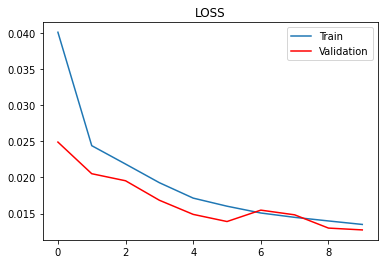

In [8]:
import os
from data.dataset import ColorHintDataset
import torch.utils.data as data
import torch
import cv2
import tqdm
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from data.transform import tensor2im
from model.res_unet.res_unet import ResUnet
from model.res_unet.res_unet_plus import ResUnetPlusPlus
from model.res_unet.unet import UNet
# from model.att_unet.att_unet import Unet
import matplotlib.image as img
import copy, time
from model.res_unet.ra_unet import ResAttdUNet
from utils import AverageMeter, SSIM, psnr, save_img
from torchsummary import summary

device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"
  print('device 0 :', torch.cuda.get_device_name(0))


def main():
    # Change to your data root directory
    root_path = "./cv_project"

    check_path = './checkpoints/'
    # Depend on runtime setting
    use_cuda = True

    # make the directory
    os.makedirs('./checkpoints/', exist_ok=True)
    os.makedirs('./outputs/', exist_ok=True)
    os.makedirs('./outputs/test', exist_ok=True)
    os.makedirs('./outputs/GroundTruth', exist_ok=True)
    os.makedirs('./outputs/Hint', exist_ok=True)
    os.makedirs('./outputs/Output', exist_ok=True)
    os.makedirs('./checkpoints', exist_ok=True)

    # Load the data
    train_dataset = ColorHintDataset(root_path, 256, "train")
    val_dataset = ColorHintDataset(root_path, 256, "val")

    dataloaders = {}
    dataloaders['train'] = torch.utils.data.DataLoader(train_dataset, batch_size=4, num_workers = 2, shuffle=True)
    dataloaders['valid'] = torch.utils.data.DataLoader(val_dataset, batch_size=4, num_workers = 2, shuffle=False)


    print('train dataset: ', len(train_dataset))
    print('validation dataset: ', len(val_dataset))


    # Select the model
    models = {'ResUnet': ResUnet(3), 'ResUnetPlusPlus': ResUnetPlusPlus(3), 'UNet': UNet(), 'ResAttdUnet' : ResAttdUNet()}
    model = ResAttdUNet().to(device)

    # load the model
    # model.load_state_dict(torch.load('./checkpoints/model-epoch-1-losses-0.00966.pth'))

    criterion = torch.nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    # summary(model, (3, 256, 256))

    lmbda = lambda epoch : 0.95
    exp_lr_scehduler = optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)
    # epochs = 30
    epochs = 10

    # initialize the
    since = time.time()
    train_loss, train_acc, valid_loss, valid_acc = [], [], [], []
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 999
    for epoch in range(epochs):
        print('Epoch {}/{}'.format(epoch + 1, epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            losses = AverageMeter()
            psnr_total = 0
            ssim_total = 0
            count = 0

            # Iterate over data.
            for i, data in enumerate(tqdm.tqdm(dataloaders[phase])):
                if use_cuda:
                    l = data["l"].to(device)
                    ab = data["ab"].to(device)
                    hint = data["hint"].to(device)
                else:
                    l = data["l"]
                    ab = data["ab"]
                    hint = data["hint"]

                gt_image = torch.cat((l, ab), dim=1)
                hint_image = torch.cat((l, hint), dim=1)
                hint_image = hint_image.float().to(device)
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(hint_image)
                    loss = criterion(outputs, ab)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        # zero the parameter gradients
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                losses.update(loss.item(), hint_image.size(0))

                if phase == 'train':
                  if i % 500 == 0:
                    print('\t Loss {loss.val:.4f} ({loss.avg:.4f})\t'.format(loss=losses))
                
                else:
                  outputs = torch.cat((l, outputs), dim = 1)
                  out_hint_np = tensor2im(outputs)
                  out_hint_bgr = cv2.cvtColor(out_hint_np, cv2.COLOR_LAB2BGR)

                  hint_np = tensor2im(hint_image)
                  hint_bgr = cv2.cvtColor(hint_np, cv2.COLOR_LAB2BGR)

                  gt_np = tensor2im(gt_image)
                  gt_bgr = cv2.cvtColor(gt_np, cv2.COLOR_LAB2BGR)
                  psnr, ssim = save_img(gt_bgr, hint_bgr, out_hint_bgr, i)
                  psnr_total += psnr
                  ssim_total += ssim

            if phase == 'train':
                exp_lr_scehduler.step()
                train_loss.append(losses.avg)

            else:
                print(' {} PSNR AVG : {:.4f} SSIM AVG : {:.4f}'.format(phase, psnr_total/len(dataloaders[phase]), ssim_total/len(dataloaders[phase])))
                valid_loss.append(losses.avg)

            print(' {} Loss: {:.3f} '.format(phase, losses.avg))

            # deep copy the model
            if phase == 'valid' and losses.avg < best_loss:
                best_idx = epoch
                best_loss = losses.avg
                best_model_wts = copy.deepcopy(model.state_dict())

                # Save model & checkpoint
                torch.save(model.state_dict(), './checkpoints/model-epoch-{}-losses-{:.5f}.pth'.format(epoch + 1, best_loss))

                print('==> best model saved - %d / %.3f' % (best_idx, best_loss))

    # Training Result
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best valid Acc: %d - %.4f' % (best_idx, best_loss))


    # Plot the training procedure
    epoch_axis = np.arange(0, epochs)
    plt.figure()
    plt.title('LOSS')
    plt.plot(epoch_axis, train_loss, epoch_axis, valid_loss, 'r-')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

if __name__ == '__main__':
    main()

# Test & Predict

In [9]:
from data.dataset import ColorHintDataset
import torch
import torch.utils.data as data
import cv2
import tqdm
import os
from data.dataset import tensor2im
from model.res_unet.res_unet import ResUnet
from model.res_unet.res_unet_plus import ResUnetPlusPlus
from model.res_unet.unet import UNet
from model.att_unet.att_unet import Unet
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"
  print('device 0 :', torch.cuda.get_device_name(0))
  
def main():
    # Change to your data root directory
    root_path = "./cv_project"

    # Depend on runtime setting
    use_cuda = True

    test_dataset = ColorHintDataset(root_path, 256, 'test')

    dataloaders = {}
    dataloaders['test'] = torch.utils.data.DataLoader(test_dataset, batch_size = 1, shuffle=False)
    print('test dataset: ', len(test_dataset))


    # state_dict = torch.load(check_point)
    model = Unet().to(device)
    # model.load_state_dict(torch.load('./checkpoints/model-epoch-2-losses-0.01331.pth'))

    os.makedirs('outputs/test', exist_ok=True)

    model.eval()
    for i, data in enumerate(tqdm.tqdm(dataloaders['test'])):
        if use_cuda:
            l = data["l"].to(device)
            hint = data["hint"].to(device)
            file_name = data["file_name"][0]

        hint_image = torch.cat((l, hint), dim=1)
        hint_np = tensor2im(hint_image)
        hint_image = hint_image.float().to(device)

        output = model(hint_image).squeeze(1)
        output = torch.cat((l, output), dim = 1)
        out_hint_np = tensor2im(output)


        hint_bgr = cv2.cvtColor(hint_np, cv2.COLOR_LAB2BGR)
        out_hint_bgr = cv2.cvtColor(out_hint_np, cv2.COLOR_LAB2BGR)


        plt.figure(1)
        cv2_imshow(hint_bgr)
        plt.figure(2)
        cv2_imshow(out_hint_bgr)

        input()
        
        # 사진 저장
        # fname = str(file_name).replace("['", '')
        # fname = fname.replace("']", '')

        # cv2.imwrite("outputs/test/"+fname, out_hint_bgr)

if __name__ == '__main__':
    main()

ImportError: ignored

# Predict - 얘 안써도 될ㅡ

In [ ]:
from data.dataset import ColorHintDataset
import torch
import torch.utils.data as data
import cv2
import tqdm
import os
from data.transform import tensor2im
from model.res_unet.res_unet import ResUnet
from model.res_unet.res_unet_plus import ResUnetPlusPlus
from model.res_unet.unet import UNet
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pylab
from test import test

def main():
    ## calculate and save psnr, ssim ##
    with torch.no_grad():
      test()
    # change to your Output data directory
    output_path = "./outputs/Output"
    file_list = os.listdir(output_path)

    ssim = np.zeros(len(file_list))
    psnr = np.zeros(len(file_list))

    for i, img_name in enumerate(file_list):
        # print(img_name)
        name = img_name.replace('.png', '')   # remove '.png'
        temp = name.split('_')
        ssim[i] += float(temp[1].replace('ssim:', ''))
        psnr[i] += float(temp[2].replace('psnr:', ''))

    ssim_avg = sum(ssim)/len(ssim)
    psnr_avg = sum(psnr)/len(psnr)

    print('Average of ssim: {}'.format(ssim_avg))
    print('Average of psnr: {}'.format(psnr_avg))

    np.save(os.path.join('./', 'ssim.npy'), ssim)
    np.save(os.path.join('./', 'psnr.npy'), psnr)

    # plot and save ssim curve
    plt.figure()
    plt.title('ssim')
    pylab.xlim(0, len(file_list) + 1)
    pylab.ylim(0, 1.1)
    plt.plot(range(1, len(file_list) + 1), ssim, label='ssim')
    plt.legend()
    plt.savefig(os.path.join('./', 'ssim.pdf'))
    plt.show()
    plt.close()

    # plot and save psnr curve
    plt.figure()
    plt.title('pnsr')
    pylab.xlim(0, len(file_list) + 1)
    pylab.ylim(0, 100)
    plt.plot(range(1, len(file_list) + 1), psnr, label='psnr')
    plt.legend()
    plt.savefig(os.path.join('./', 'psnr.pdf'))
    plt.show()
    plt.close()

if __name__ == '__main__':
    main()